# First steps with the transformers HuggingFace module : tokenization and attention weights

**Copy** this notebook (File>Save a copy in Drive)

**Add your name** in the copied notebook's name

When you're done, **send me an email** with subject "ML3 tokenization lab + last NAME + first name", with the link **with EDITION rights**



## The Huggingface startup

- https://huggingface.co/
- franco-american
- core = open-source library for NLP models
  - in particular : the **transformers**  module : training / use of transformer-based pretrained models
  - integrates **hundreds of pretrained models**, provided by various teams, worldwide
- business model? cf. usual models for open-source softwares https://blog.timescale.com/blog/how-open-source-software-makes-money-time-series-database-f3e4be409467/
  - in this case, "inference API" https://huggingface.co/pricing, API for fast usage of pretrained models


Huggingface provides a full course on transformer-based models and how to train/use them in Huggingface: https://huggingface.co/course/chapter1/1

In [ ]:
!pip install sacremoses

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 897.5/897.5 kB 14.3 MB/s eta 0:00:00


# Tokenization into subwords

In [ ]:
import torch

# import (after potential installation) of the transformers module
try:
  from transformers import AutoModel, AutoTokenizer
except ImportError:
  !pip install transformers
  from transformers import AutoModel, AutoTokenizer


# Browsing the available models

Huggingface is a hub for a huge number of transformer-based models, either pre-trained models (generally to be used in additional training for downstream tasks) or already fine-tuned models.

Models in Huggingface are identified by a name. E.g. "bert-base-multilingual-cased".
Cf. the list of models https://huggingface.co/models?sort=downloads

Each model is tagged with several tags, among which is the main (pre)training task. In the models' page, you can filter by tag (left panel).

**TODO_0**: Study the list of tasks https://huggingface.co/tasks and find out which correspond to masked language modeling and to "plain" (or "causal", or unidirectional left-to-right) language modeling.


The fill-Mask tasks do correspond to masked language modeling [available here](https://huggingface.co/tasks/fill-mask).
The text classification tasks correspond to causal language modeling [available here](https://huggingface.co/tasks/text-classification)

## Loading a tokenizer


Each model is associated with a specific tokenizer: the one used for tokenizing the (pre-)training corpus.

Given a model name, the AutoTokenizer / AutoModel / AutoConfig classes can "guess" the exact python class for the corresponding tokenizer / model / config.

For instance the **'bert-base-multilingual-cased'** name corresponds to the BertModel, BertTokenizerFast and BertConfig classes.

In [ ]:

bert_tokenizer = AutoTokenizer.from_pretrained("bert-base-multilingual-cased")
print(type(bert_tokenizer))


tokenizer_config.json:   0%|          | 0.00/29.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/625 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/996k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/1.96M [00:00<?, ?B/s]

<class 'transformers.models.bert.tokenization_bert_fast.BertTokenizerFast'>


In [ ]:
sent = "Aujourd'hui, j'essaie de comprendre les intringuants transformers."

# "encode" method: tokenization + conversion to token ids :
print("1:", bert_tokenizer.encode(sent))
# readable form
print("2:", bert_tokenizer.convert_ids_to_tokens(bert_tokenizer.encode(sent)))
print()

# without special symbols:
print("3:", bert_tokenizer.encode(sent, add_special_tokens=False))
print("4:", bert_tokenizer.convert_ids_to_tokens(bert_tokenizer.encode(sent, add_special_tokens=False)))
print()

# equivalent to:
print("5:", bert_tokenizer.tokenize(sent))
print("6:", bert_tokenizer.convert_tokens_to_ids(bert_tokenizer.tokenize(sent)))
print()

1: [101, 69169, 112, 17287, 117, 178, 112, 61872, 10112, 10104, 73932, 10152, 26391, 13135, 41542, 10107, 99662, 10901, 119, 102]
2: ['[CLS]', 'Aujourd', "'", 'hui', ',', 'j', "'", 'essai', '##e', 'de', 'comprendre', 'les', 'int', '##ring', '##uant', '##s', 'transform', '##ers', '.', '[SEP]']

3: [69169, 112, 17287, 117, 178, 112, 61872, 10112, 10104, 73932, 10152, 26391, 13135, 41542, 10107, 99662, 10901, 119]
4: ['Aujourd', "'", 'hui', ',', 'j', "'", 'essai', '##e', 'de', 'comprendre', 'les', 'int', '##ring', '##uant', '##s', 'transform', '##ers', '.']

5: ['Aujourd', "'", 'hui', ',', 'j', "'", 'essai', '##e', 'de', 'comprendre', 'les', 'int', '##ring', '##uant', '##s', 'transform', '##ers', '.']
6: [69169, 112, 17287, 117, 178, 112, 61872, 10112, 10104, 73932, 10152, 26391, 13135, 41542, 10107, 99662, 10901, 119]



# TODO1: encoding a pair of sentences

Search into the doc of the encode method how to encode a pair of sentences (cf. the BERT model is trained on pairs of sequences)

https://huggingface.co/docs/transformers/v4.24.0/en/main_classes/tokenizer#transformers.PreTrainedTokenizerFast


In [ ]:
sent2 = "Une deuxième phrase."
bert_tokenizer(text=[sent,sent2])

{'input_ids': [[101, 69169, 112, 17287, 117, 178, 112, 61872, 10112, 10104, 73932, 10152, 26391, 13135, 41542, 10107, 99662, 10901, 119, 102], [101, 13509, 16665, 47320, 119, 102]], 'token_type_ids': [[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0]], 'attention_mask': [[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1], [1, 1, 1, 1, 1, 1]]}

# TODO2: using the FlauBERT tokenizer and model

We use now the tokenizer of the French model **FlauBERT**, *flaubert_base_cased*, a model pre-trained on the **MLM** task only
  * cf.
    * list of available models : https://huggingface.co/transformers/pretrained_models.html)
    * and FlauBERT's doc in HuggingFace https://huggingface.co/transformers/model_doc/flaubert.html
    * cf. paper Le et al. 2020 https://aclanthology.org/2020.lrec-1.302/  French team

*   load the *flaubert_base_cased*'s tokenizer
*   compare its tokenization with multilingual BERT's one
Flaubert has less subword units in the output tokenization, probably because it is French-specialized. Bert does mark the subword units at the beggining ot them with a "##" and flaubert does so by marking end of words with a special </w> character

*   how do you explain that certain inflected forms are not split into subwords
Some inflected forms are not split into subwords because htey are frequent enough to be cosidered as a full token.

*   what are the integer ids of the "special tokens" ?
Special tokens in BERT are [CLS] and [SEP] and indexed as 101 and 102, while with flaubert they are \<s> and </s>. They are other special tokens in both model such as padding tokens for example. These special tokens can be retrieved with the tokenizer.all_special_tokens attribute.



In [ ]:
texts = ["eoari8 é§ êêçth",
         "J'essaie de comprendre les transformers.",
         "Nous comprenions bien le cours.",
         "Le code comprend des erreurs.",
         "Il n'a pas bien compris le nouveau cours!"]

In [ ]:
# multilingual bert's tokenization
for sent in texts:
    print("\nBert tokenization")
    print(bert_tokenizer.encode(sent, add_special_tokens=True))
    print(bert_tokenizer.convert_ids_to_tokens(bert_tokenizer.encode(sent, add_special_tokens=True)))



Bert tokenization
[101, 13934, 12476, 11396, 263, 204, 264, 15915, 13406, 11143, 102]
['[CLS]', 'eo', '##ari', '##8', 'é', '§', 'ê', '##ê', '##ç', '##th', '[SEP]']

Bert tokenization
[101, 147, 112, 61872, 10112, 10104, 73932, 10152, 99662, 10901, 119, 102]
['[CLS]', 'J', "'", 'essai', '##e', 'de', 'comprendre', 'les', 'transform', '##ers', '.', '[SEP]']

Bert tokenization
[101, 52208, 10212, 30619, 95494, 10107, 12028, 10141, 14211, 119, 102]
['[CLS]', 'Nous', 'com', '##pre', '##nion', '##s', 'bien', 'le', 'cours', '.', '[SEP]']

Bert tokenization
[101, 10281, 16964, 29316, 10139, 98344, 10107, 119, 102]
['[CLS]', 'Le', 'code', 'comprend', 'des', 'erreur', '##s', '.', '[SEP]']

Bert tokenization
[101, 10282, 182, 112, 169, 10801, 12028, 33497, 10141, 14285, 14211, 106, 102]
['[CLS]', 'Il', 'n', "'", 'a', 'pas', 'bien', 'compris', 'le', 'nouveau', 'cours', '!', '[SEP]']


In [ ]:
# we need sacremoses because
# flaubert's tokenization uses as first step a tokenization into words by moses
try:
  import sacremoses
except ImportError:
  !pip install sacremoses
  import sacremoses

from transformers import AutoTokenizer, FlaubertForSequenceClassification

flaubert_tokenizer = AutoTokenizer.from_pretrained("flaubert/flaubert_base_cased")

tokenizer_config.json:   0%|          | 0.00/28.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/1.50k [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/1.56M [00:00<?, ?B/s]

merges.txt:   0%|          | 0.00/896k [00:00<?, ?B/s]

In [ ]:
for sent in texts:
    print('FlauBert tokenization')
    print(flaubert_tokenizer.encode(sent, add_special_tokens=True))
    print(flaubert_tokenizer.convert_ids_to_tokens(flaubert_tokenizer.encode(sent, add_special_tokens=True)))
    print()

FlauBert tokenization
[0, 303, 487, 3241, 378, 218, 11592, 4821, 4821, 3394, 3051, 1]
['<s>', 'e', 'o', 'ari', '8</w>', 'é</w>', '§</w>', 'ê', 'ê', 'ç', 'th</w>', '</s>']

FlauBert tokenization
[0, 158, 5213, 15, 965, 22, 14659, 896, 16, 1]
['<s>', "J'</w>", 'essaie</w>', 'de</w>', 'comprendre</w>', 'les</w>', 'transform', 'ers</w>', '.</w>', '</s>']

FlauBert tokenization
[0, 150, 42582, 6663, 83, 20, 210, 16, 1]
['<s>', 'Nous</w>', 'compren', 'ions</w>', 'bien</w>', 'le</w>', 'cours</w>', '.</w>', '</s>']

FlauBert tokenization
[0, 55, 1138, 976, 23, 3842, 16, 1]
['<s>', 'Le</w>', 'code</w>', 'comprend</w>', 'des</w>', 'erreurs</w>', '.</w>', '</s>']

FlauBert tokenization
[0, 59, 51, 34, 42, 83, 681, 20, 238, 210, 82, 1]
['<s>', 'Il</w>', "n'</w>", 'a</w>', 'pas</w>', 'bien</w>', 'compris</w>', 'le</w>', 'nouveau</w>', 'cours</w>', '!</w>', '</s>']



# TODO3: produce input tensors for the FlauBERT model, given a list of sentences

We want to encode a batch of sequences into a tensor that can be provided as input to the FlauBERT model.

This can be done using the `__call__` method of a tokenizer.

**REMINDER** : if `toto` is an instance of class Titi, then `toto()` calls the `__call__` method of class Titi

 * study the `__call__` method inherited by the FlaubertTokenizer class (go up the inheritance hierarchy of FlauBERT's tokenizer: https://huggingface.co/transformers/model_doc/flaubert.html#transformers.FlaubertTokenizer

 * call it on the `texts` variable, choosing the relevant options to  **truncate** / **pad** all sequences to a total length of 10 tokens (including tokens for special symbols)

 * print and explain each item in the output dictionary
  * input_ids: the ids for each token in each sentence that has been tokenized. Each id maps to its own token and we can decode it with the decode() methods.
  * input_type_ids : equals 1 for every token that is present in sequence B and equals 0 for every token that is present in sequence A. It is useful to keep track of which tokens to mask when doing causal language modeling
  * attention_mask : equals 1 at every position where input_ids is not padding token. It keeps track of padding tokens in order to nullify every token that is not required during loss computation.

 * what is the id of the padding symbol?
2

 * how can we obtain the torch tensors instead of lists of integers?
 pass the parameter return_tensors="pt" for pytorch tensors


In [ ]:
# encodings =  ...
encodings = flaubert_tokenizer(texts,
                               truncation=True,
                               add_special_tokens=True,
                               padding=True,
                               max_length=10)
print("encodings (as lists):\n",encodings)

# tensor_encodings ...
tensor_encodings = flaubert_tokenizer(texts,
                                      truncation=True,
                                      add_special_tokens=True,
                                      padding=True,
                                      max_length=10,
                                      return_tensors="pt")
print("\nencodings (as tensors):\n",tensor_encodings)

encodings (as lists):
 {'input_ids': [[0, 303, 487, 3241, 378, 218, 11592, 4821, 4821, 1], [0, 158, 5213, 15, 965, 22, 14659, 896, 16, 1], [0, 150, 42582, 6663, 83, 20, 210, 16, 1, 2], [0, 55, 1138, 976, 23, 3842, 16, 1, 2, 2], [0, 59, 51, 34, 42, 83, 681, 20, 238, 1]], 'token_type_ids': [[0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0, 0, 0]], 'attention_mask': [[1, 1, 1, 1, 1, 1, 1, 1, 1, 1], [1, 1, 1, 1, 1, 1, 1, 1, 1, 1], [1, 1, 1, 1, 1, 1, 1, 1, 1, 0], [1, 1, 1, 1, 1, 1, 1, 1, 0, 0], [1, 1, 1, 1, 1, 1, 1, 1, 1, 1]]}

encodings (as tensors):
 {'input_ids': tensor([[    0,   303,   487,  3241,   378,   218, 11592,  4821,  4821,     1],
        [    0,   158,  5213,    15,   965,    22, 14659,   896,    16,     1],
        [    0,   150, 42582,  6663,    83,    20,   210,    16,     1,     2],
        [    0,    55,  1138,   976,    23,  3842,    16,     1,     2,     2],
        [

# TODO4 : Forward propagation

You will now run the model on the sentences in `texts`, considered as an input batch of sentences.

 * Use `AutoModel.from_pretrained` to load the pretrained FlauBERT model
 * encode the sentences using the tokenizer
 * and forward propagate
 * from the output, produce a tensor containing the contextual representations
   * at the last layer of the model,
   * for the \<s\> token of each sequence in the batch



**Tips**:

* Study the members of its class (FlaubertModel) https://huggingface.co/transformers/model_doc/flaubert.html#flaubertmodel

* **NB** : FlaubertModel indirectly inherits from the `nn.Module` class: so instead of calling the `forward` method directly, use  `name_of_instance_variable()`

* study the `__forward__` method here https://huggingface.co/transformers/model_doc/flaubert.html#flaubertmodel

* `__forward__` takes torch tensors as input
* call it using the `return_dict=True` option, in order to better understand its output

* study the shape of the output tensor(s)

* rem: the attention mask is not necessary (see below: padded tokens don't receive attention)

In [ ]:


# model = ...
model = AutoModel.from_pretrained("flaubert/flaubert_base_cased")

# tensor_encodings = ...
tensor_encodings = flaubert_tokenizer(texts,
                                      truncation=True,
                                      add_special_tokens=True,
                                      padding=True,
                                      max_length=10,
                                      return_tensors="pt")
# output =
output = model(tensor_encodings["input_ids"], return_dict=True)
print("tensor of contextual represezntations of all tokens has size:",output["last_hidden_state"].size())
print()

# s_contextual_vectors =
s_contextual_vectors = output["last_hidden_state"][:,0,:]
print("retrieved contextual vectors of 5 tokens and has shape:",s_contextual_vectors.size())
print("actual contextual representations of 5 tokens:\n",s_contextual_vectors)


pytorch_model.bin:   0%|          | 0.00/553M [00:00<?, ?B/s]

tensor of contextual represezntations of all tokens has size: torch.Size([5, 10, 768])

retrieved contextual vectors of 5 tokens and has shape: torch.Size([5, 768])
actual contextual representations of 5 tokens:
 tensor([[-2.5945e+00,  4.3586e-01, -1.2133e-01,  ..., -3.1167e+00,
         -8.5201e-01,  2.9323e+00],
        [-4.9052e-01, -7.9369e-02,  1.2022e-01,  ..., -5.9671e-01,
          1.3901e+00,  1.8761e+00],
        [-4.5638e-01,  1.5039e-01, -5.8168e-01,  ..., -4.9592e-01,
          1.3167e+00,  1.8955e+00],
        [-8.1783e-02, -4.5925e-01, -5.2189e-02,  ..., -2.3706e-03,
          9.1420e-01,  1.3428e+00],
        [-2.1181e+00, -8.1037e-01,  2.0389e-01,  ..., -2.0137e+00,
         -2.8861e-01,  1.1774e+00]], grad_fn=<SliceBackward0>)


* shape of last_hidden_state tensor is [5, 10, 768]
  * 5: number of sentences passed in input to the model
  * 10: number of tokens per sentence
  * 768: number of dimensions in embedding associated with each token of each sentence  
* If we select the embedding for the first token for each sequence, the output tensor has shape [5, 768]

# TODO5: study of self-attention weights

Let us focus on the 4th sentence, which ends with 2 pad tokens.

* Print the self-attention weights
  * for the 4th token of sent4 ("comprend")
  * on the first attention head of the last layer
* Is attention paid to padded tokens ?
By definition we do not pay attention to padding token

Tips : study of self-attention weights
* find out how to output the attention weights
output_attention = True in model's parameters \


* study their shape
we have as output a tuple of 12 tensors of the following shape: 5, 12, 10, 10 (batch_size, num_heads, sequence_length, sequence_length)
  *num_layers: number of layers in the transformer, there is one attention layer applied after each forward pass inside the decoder,
  * batch_size: attention is applied to each sequence of the tensor
  * num_heads: number of attention head applied at each layer, their output is then averaged
  * sequence_length: axis x
  * sequence_length: axis y

* isolate the weights for first head of last layer \

attention_output["attentions"][-1][:,0,:,:]
this gives a tensor of shape 5,10,10 (batch_size, sequence_length, sequence_length)  

\

In [ ]:
# tensor_encodings = ...
tensor_encodings = flaubert_tokenizer(texts,
                                      truncation=True,
                                      add_special_tokens=True,
                                      padding=True,
                                      max_length=10,
                                      return_tensors="pt")
attention_output = model(tensor_encodings["input_ids"], output_attentions=True, return_dict=True)

attention_output["attentions"][-1][:,0,:,:].size()


torch.Size([5, 10, 10])

In [ ]:
for i in range(len(attention_output["attentions"])): #for each layer
  print(attention_output["attentions"][i].size()) #shape: batch_size, num_heads, sequence_length, sequence_length

torch.Size([5, 12, 10, 10])
torch.Size([5, 12, 10, 10])
torch.Size([5, 12, 10, 10])
torch.Size([5, 12, 10, 10])
torch.Size([5, 12, 10, 10])
torch.Size([5, 12, 10, 10])
torch.Size([5, 12, 10, 10])
torch.Size([5, 12, 10, 10])
torch.Size([5, 12, 10, 10])
torch.Size([5, 12, 10, 10])
torch.Size([5, 12, 10, 10])
torch.Size([5, 12, 10, 10])


* to find out where the self-attention weights are for a given token (the "comprend" token), remember these sum to 1

In [ ]:
#let's consider the last layer, and the first attention head
idx_layer = -1
idx_head = 0

# "comprend is in sequence 3 (the fourth), and is at position 3"
idx_sequence = 3
idx_token = 3

heads_of_comprend_token = attention_output["attentions"][idx_layer][idx_sequence,idx_head,idx_token,:]

print(f"Attention weights for 'comprend' token on head {idx_head} at layer {idx_layer} :{heads_of_comprend_token}")

#indeed it sums up to 1
print(f"Sum of weights should equal 1: sum={sum(heads_of_comprend_token)}")

Attention weights for 'comprend' token on head 0 at layer -1 :tensor([3.9431e-08, 5.8437e-09, 4.8380e-10, 9.7933e-01, 1.6403e-04, 4.5206e-05,
        1.0766e-02, 9.6905e-03, 0.0000e+00, 0.0000e+00],
       grad_fn=<SliceBackward0>)
Sum of weights should equal 1: sum=0.9999999403953552


We can see that attention is not computed for padding tokens

In [ ]:
#let's consider the last layer, and the first attention head
idx_layer = -1
idx_head = 0

# "comprend is in sequence 3 (the fourth), and is at position 3"
idx_sequence = 3
idx_token = 9 #column 9 has the attention weight for padding token for each row (for each token in the sequence)

heads_of_padding_token = attention_output["attentions"][idx_layer][idx_sequence,idx_head,:,idx_token]

#all attention weights for padding token at index 9
heads_of_padding_token

tensor([0., 0., 0., 0., 0., 0., 0., 0., 0., 0.], grad_fn=<SelectBackward0>)

## Bonus : plot attention matrices

Attention matrices at several layers can be vizualized using  matplotlib's `matshow` method

(which displays a color-coded matrix)

cf. https://matplotlib.org/stable/gallery/images_contours_and_fields/matshow.html#matshow

E.g. the attention matrix of the first head, at the 1st layer, or the last layer...

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import MultipleLocator


<ipython-input-30-29025ba9af95>:8: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels([""]+[flaubert_tokenizer.decode(id) for id in tensor_encodings["input_ids"][idx_sequence]])
<ipython-input-30-29025ba9af95>:9: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels([""]+[flaubert_tokenizer.decode(id) for id in tensor_encodings["input_ids"][idx_sequence]])


(array([-1.,  0.,  1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10.]),
 [Text(0, -1.0, ''),
  Text(0, 0.0, '<s>'),
  Text(0, 1.0, 'e'),
  Text(0, 2.0, 'o'),
  Text(0, 3.0, 'ari'),
  Text(0, 4.0, '8'),
  Text(0, 5.0, 'é'),
  Text(0, 6.0, '§'),
  Text(0, 7.0, 'ê'),
  Text(0, 8.0, 'ê'),
  Text(0, 9.0, '</s>'),
  Text(0, 10.0, '')])

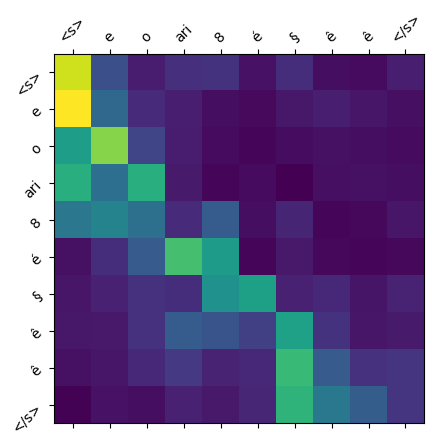

In [ ]:
#the attention matrix for 1st sequence of the first head, at the 1st layer
idx_head = 0
idx_layer = 0
idx_sequence = 0

fig, ax = plt.subplots()
ax.matshow(attention_output["attentions"][idx_layer][idx_sequence,idx_head,:,:].detach().numpy())
ax.set_xticklabels([""]+[flaubert_tokenizer.decode(id) for id in tensor_encodings["input_ids"][idx_sequence]])
ax.set_yticklabels([""]+[flaubert_tokenizer.decode(id) for id in tensor_encodings["input_ids"][idx_sequence]])
ax.xaxis.set_major_locator(MultipleLocator(base=1.0))
ax.yaxis.set_major_locator(MultipleLocator(base=1.0))
plt.xticks(rotation = 45)
plt.yticks(rotation = 45)

<ipython-input-31-cabe42cc959b>:8: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels([""]+[flaubert_tokenizer.decode(id) for id in tensor_encodings["input_ids"][idx_sequence]])
<ipython-input-31-cabe42cc959b>:9: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels([""]+[flaubert_tokenizer.decode(id) for id in tensor_encodings["input_ids"][idx_sequence]])


(array([-1.,  0.,  1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10.]),
 [Text(0, -1.0, ''),
  Text(0, 0.0, '<s>'),
  Text(0, 1.0, 'e'),
  Text(0, 2.0, 'o'),
  Text(0, 3.0, 'ari'),
  Text(0, 4.0, '8'),
  Text(0, 5.0, 'é'),
  Text(0, 6.0, '§'),
  Text(0, 7.0, 'ê'),
  Text(0, 8.0, 'ê'),
  Text(0, 9.0, '</s>'),
  Text(0, 10.0, '')])

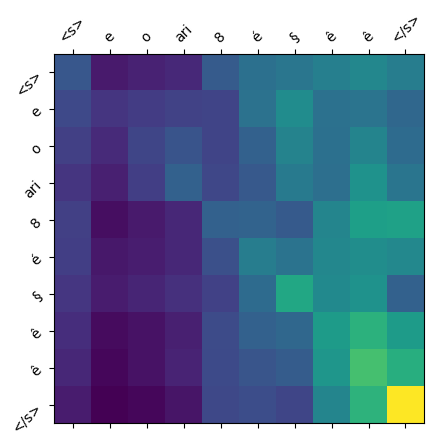

In [ ]:
#the attention matrix of first sequence on the first head, at the last layer...
idx_head = 0
idx_sequence = 0
idx_layer = -1

fig, ax = plt.subplots()
ax.matshow(attention_output["attentions"][idx_layer][idx_sequence,idx_head,:,:].detach().numpy())
ax.set_xticklabels([""]+[flaubert_tokenizer.decode(id) for id in tensor_encodings["input_ids"][idx_sequence]])
ax.set_yticklabels([""]+[flaubert_tokenizer.decode(id) for id in tensor_encodings["input_ids"][idx_sequence]])
ax.xaxis.set_major_locator(MultipleLocator(base=1.0))
ax.yaxis.set_major_locator(MultipleLocator(base=1.0))
plt.xticks(rotation = 45)
plt.yticks(rotation = 45)

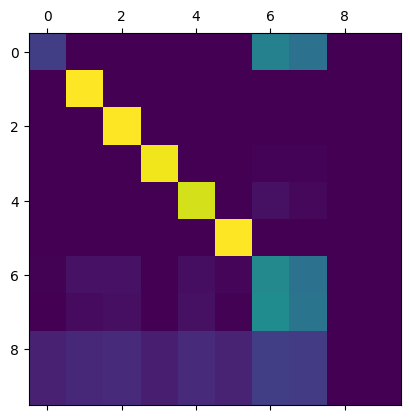

In [ ]:
# the attention matrix of the first head, at the last layer on sequence 4 which is padded...
plt.matshow(attention_output["attentions"][-1][3,0,:,:].detach().numpy())
#we can see that padding tokens do not produce attention computation

Plot all attention weights of first head for each layer

<ipython-input-20-deb36e569aa3>:10: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels([""]+[flaubert_tokenizer.decode(id) for id in tensor_encodings["input_ids"][idx_sequence]])
<ipython-input-20-deb36e569aa3>:11: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels([""]+[flaubert_tokenizer.decode(id) for id in tensor_encodings["input_ids"][idx_sequence]])


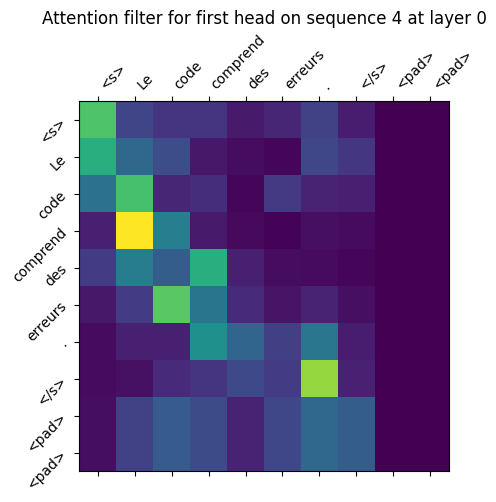

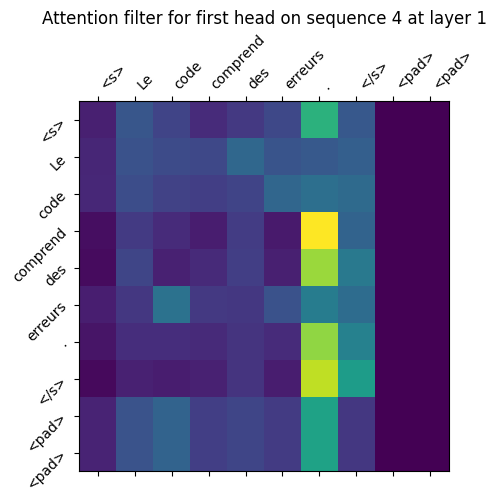

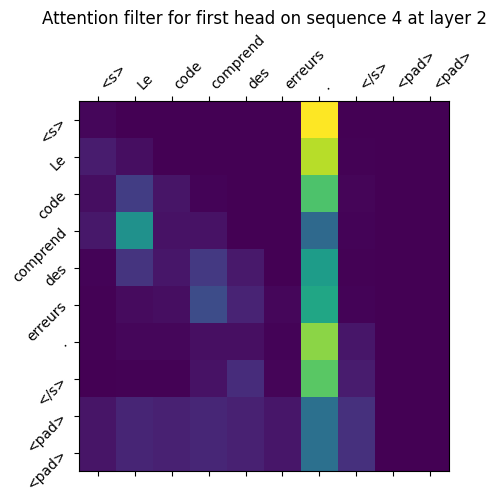

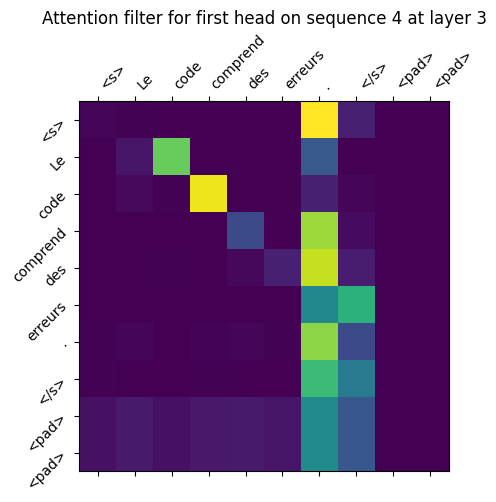

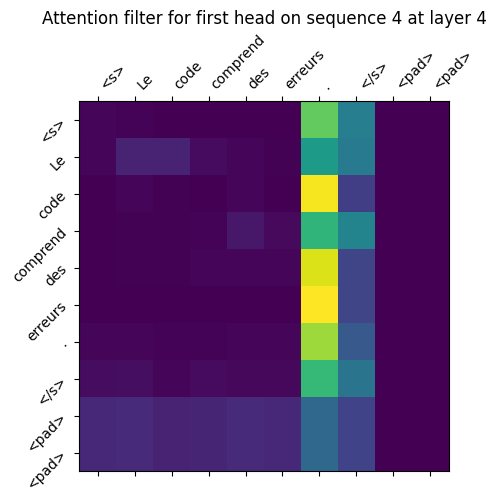

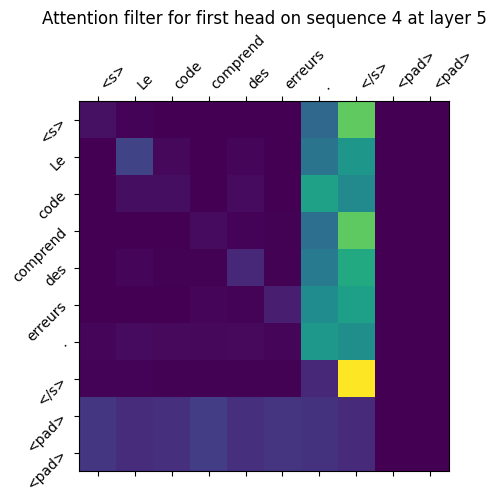

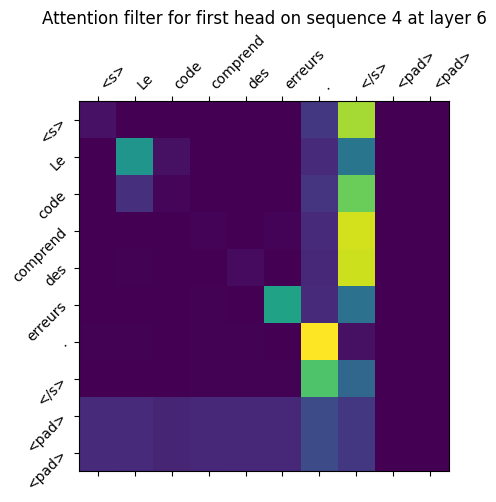

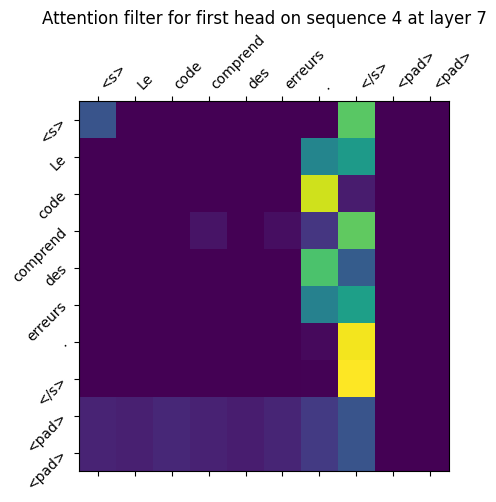

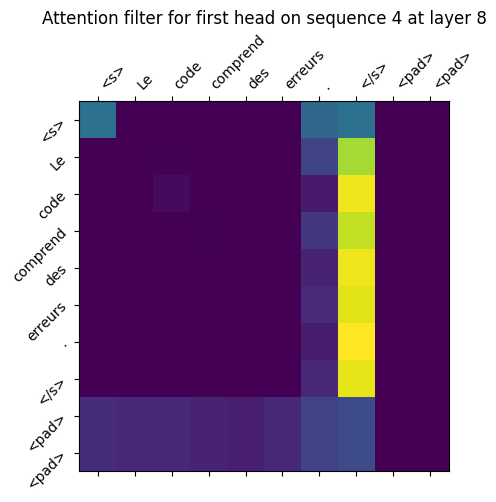

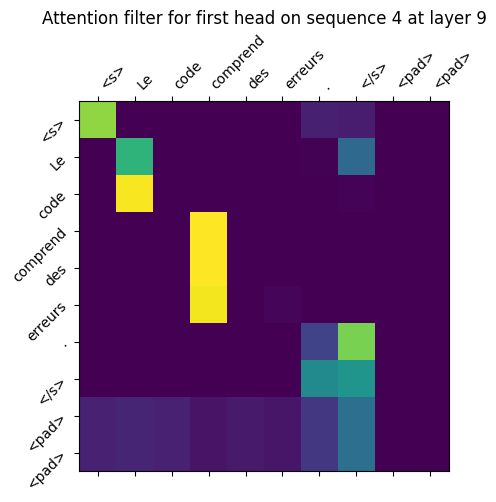

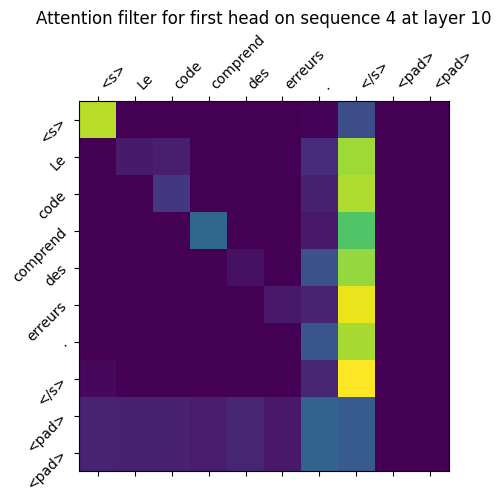

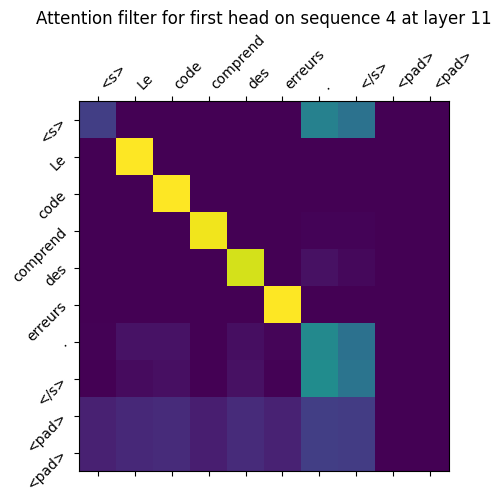

In [ ]:
#the attention matrix of the first head, at EACH layer for sequence 4...
idx_sequence = 3
idx_head = 0

for idx_layer in range(len(attention_output["attentions"])):
    fig, ax = plt.subplots()
    plt.title(f"Attention filter for first head on sequence {idx_sequence+1} at layer {str(idx_layer)}")
    attentions_results = attention_output["attentions"][idx_layer][idx_sequence,idx_head,:,:]
    ax.matshow(attentions_results.detach().numpy())
    ax.set_xticklabels([""]+[flaubert_tokenizer.decode(id) for id in tensor_encodings["input_ids"][idx_sequence]])
    ax.set_yticklabels([""]+[flaubert_tokenizer.decode(id) for id in tensor_encodings["input_ids"][idx_sequence]])
    ax.xaxis.set_major_locator(MultipleLocator(base=1.0))
    ax.yaxis.set_major_locator(MultipleLocator(base=1.0))
    plt.xticks(rotation = 45, horizontalalignment="left")
    plt.yticks(rotation = 45, horizontalalignment="right")

Plot mean attention received by each token on first layer on sequence 4 \
(This shows how several attention heads can help to focus on different parts on the sequences.)

<ipython-input-35-8f7157da41d4>:9: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels([""]+[flaubert_tokenizer.decode(id) for id in tensor_encodings["input_ids"][idx_sequence]])


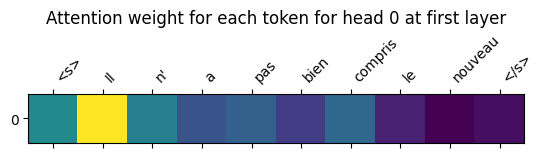

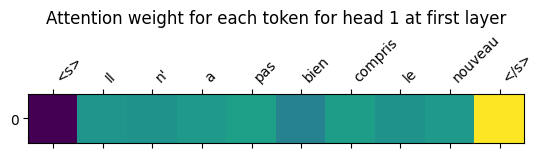

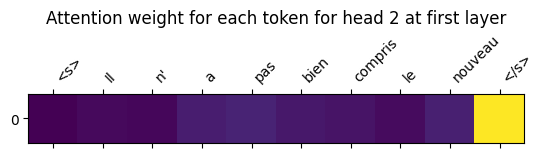

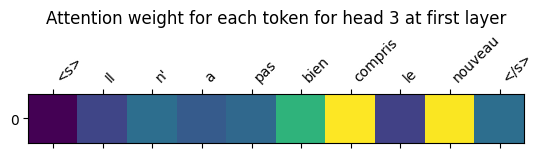

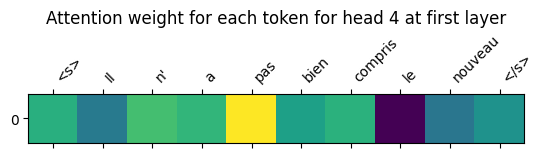

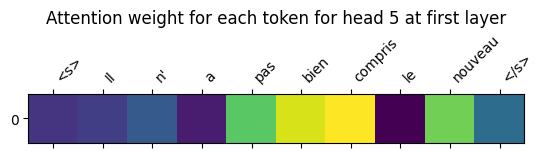

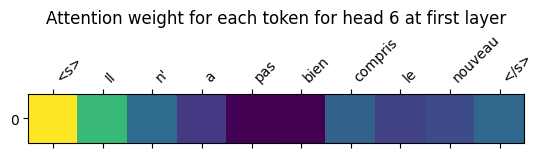

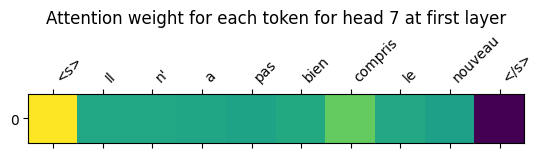

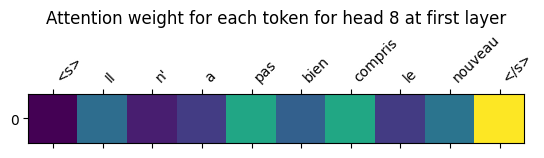

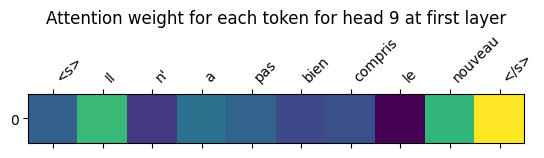

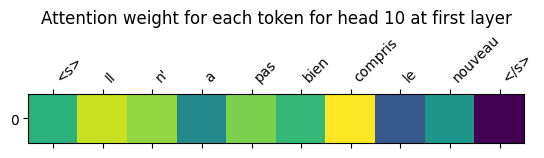

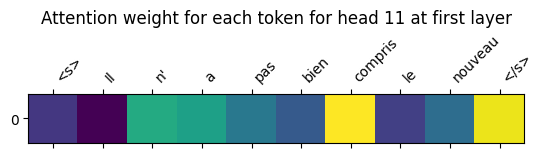

In [ ]:
idx_sequence = 4
idx_layer = 0
for idx_head in range(0, 12):
    fig, ax = plt.subplots()
    plt.title(f"Attention weight for each token for head {str(idx_head)} at first layer")
    summed = torch.mean(attention_output["attentions"][idx_layer][idx_sequence,idx_head,:,:], dim=0)
    ax.matshow(summed.view([1,-1]).detach().numpy())

    ax.set_xticklabels([""]+[flaubert_tokenizer.decode(id) for id in tensor_encodings["input_ids"][idx_sequence]])
    # ax.set_yticklabels([""]+[flaubert_tokenizer.decode(id) for id in tensor_encodings["input_ids"][idx_sequence]])
    ax.xaxis.set_major_locator(MultipleLocator(base=1.0))
    ax.yaxis.set_major_locator(MultipleLocator(base=1.0))
    plt.xticks(rotation = 45, horizontalalignment="left")
    # plt.yticks(rotation = 45, horizontalalignment="right"